# Topic Modelling Article Titles with BERTopic

Parts of our notebook: 
* Data Load 
* Preprocessing
* Clustering
* Modelling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic

C:\Users\Satriock\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Load

In [2]:
df_titles = pd.read_csv(r"./../../data/raw/JPTIIK_unlabeled.csv")

In [3]:
print(df_titles.head())

                                             article
0  Sistem Pengaman Kendaraan Roda Dua dengan Peng...
1  Implementasi Sistem Pendukung Keputusan untuk ...
2  Pengembangan Database E-Learning PT XYZ menggu...
3  Mekanisme Penyediaan Layanan pada Perangkat Sm...
4  Pengendalian Suhu dan Kelembapan Udara untuk B...


## Preprocessing

In [4]:
vectorizer = TfidfVectorizer(max_features=500)
features_tfidf = vectorizer.fit_transform(df_titles['article'])

In [5]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_tfidf.toarray())

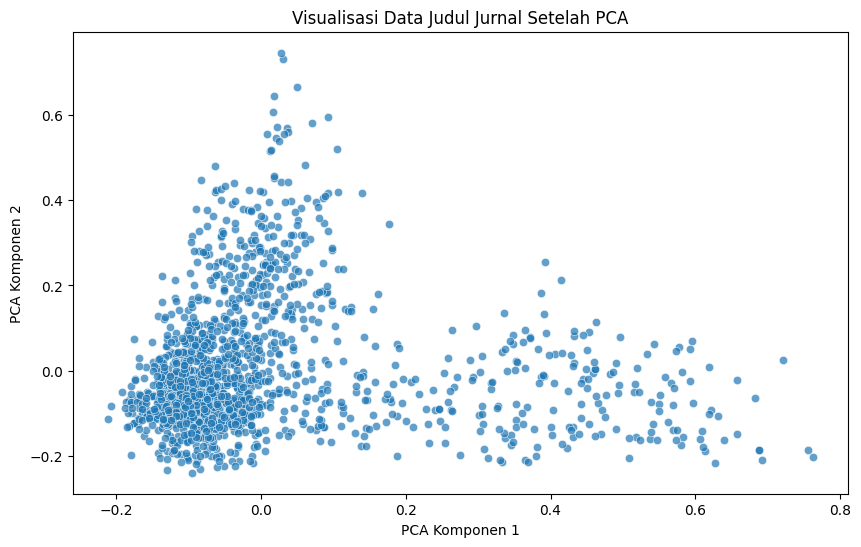

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], alpha=0.7)
plt.title('Visualisasi Data Judul Jurnal Setelah PCA')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.show()

## Clustering

In [7]:
n_clusters = 3 
kmeans = KMeans(n_clusters, random_state=42, n_init=10)

In [8]:
cluster_labels = kmeans.fit_predict(features_pca)

In [9]:
df_titles["cluster"] = cluster_labels

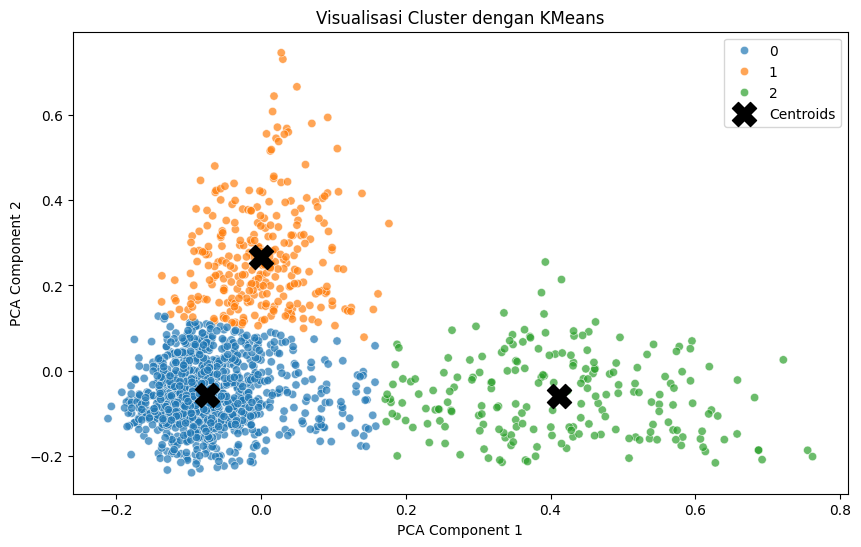

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=cluster_labels, palette="tab10", alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=300, label="Centroids")

plt.title("Visualisasi Cluster dengan KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [11]:
silhouette_avg = silhouette_score(features_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6020511446495499


In [12]:
for cluster in range(n_clusters):
    df_titles[df_titles["cluster"] == cluster].to_csv(f"../../data/raw/clustered/cluster_{cluster}.csv", index=False)

## Modelling

In [13]:
cluster_0 = pd.read_csv("../../data/raw/clustered/cluster_0.csv")
cluster_1 = pd.read_csv("../../data/raw/clustered/cluster_1.csv")
cluster_2 = pd.read_csv("../../data/raw/clustered/cluster_2.csv")

clusters = {0: cluster_0, 1: cluster_1, 2: cluster_2}

In [14]:
topic_models = {}
topics_per_cluster = {}

In [15]:
for cluster in range(n_clusters):
    print(f"\n🔍 **Analisis Topik untuk Cluster {cluster}**")
    
    cluster_data = df_titles[df_titles["cluster"] == cluster]["article"].tolist()

    topic_model = BERTopic()
    
    topics, probs = topic_model.fit_transform(cluster_data)
    
    topic_models[cluster] = topic_model
    topics_per_cluster[cluster] = topics

    print(topic_model.get_topic_info())


🔍 **Analisis Topik untuk Cluster 0**
    Topic  Count                                            Name  \
0      -1    247                -1_dan_pada_analisis_menggunakan   
1       0    115              0_monitoring_fuzzy_sistem_berbasis   
2       1     89                         1_roda_kursi_pintar_dan   
3       2     54           2_learning_belajar_hasil_pembelajaran   
4       3     51           3_convolutional_neural_network_speech   
5       4     43               4_vector_support_machine_sentimen   
6       5     41       5_usability_evaluasi_testing_meningkatkan   
7       6     39                  6_bayes_nave_naive_berdasarkan   
8       7     37               7_aplikasi_mobile_model_framework   
9       8     34                 8_media_pembelajaran_smk_sosial   
10      9     31       9_knearest_neighbor_neighbors_klasifikasi   
11     10     28               10_informasi_teknologi_cobit_2019   
12     11     27                11_routing_protokol_network_load   
13     12 

In [16]:
for cluster in range(n_clusters):
    topic_model = topic_models[cluster]
    fig = topic_model.visualize_barchart(top_n_topics=3)
    
    file_name = f"cluster_{cluster}_topics.html"
    fig.write_html(file_name)
    
    print(f"Grafik untuk Cluster {cluster} disimpan di {file_name}")


Grafik untuk Cluster 0 disimpan di cluster_0_topics.html
Grafik untuk Cluster 1 disimpan di cluster_1_topics.html
Grafik untuk Cluster 2 disimpan di cluster_2_topics.html


In [ ]:
for cluster in range(n_clusters):
    topic_model = topic_models[cluster]
    fig = topic_model.visualize_barchart(top_n_topics=3)
    
    print(f"Menampilkan Cluster {cluster}")
    fig.show()
    
    time.sleep(2)

Menampilkan Cluster 0


Menampilkan Cluster 1


Menampilkan Cluster 2
